# Machine Learning Lab 1

## Assignment 2 (Deadline : 4/12/2022 11:59PM)

Total Points : 100

Your answers must be entered in LMS by midnight of the day it is due. 

If the question requires a textual response, you can create a PDF and upload that. 

The PDF might be generated from MS-WORD, LATEX, the image of a hand- written response, or using any other mechanism. 

Code must be uploaded and may require demonstration to the TA. 

Numbers in the parentheses indicate points allocated to the question. 

**Naming Convention**: FirstName_LastName_Lab2_TLP23.ipynb

# Question 1 (50 points)

## 1. Read the data into a numpy array

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# Read data from file: 'data.csv'. 
# Note that the first row has the number of inputs and number of outputs specified.
# For your reference: you can use "np.loadtxt".
data = np.loadtxt('data.csv', delimiter=',', skiprows=1)
data

array([[  51.87,   79.72, 1249.99],
       [ -30.66,  -15.64, -516.61],
       [ -57.57,   94.22,  312.09],
       ...,
       [ -18.6 ,   32.61,  -45.14],
       [ -38.31,   77.81,  -20.13],
       [ -38.33,   45.69, -460.47]])

## 2. Plot and explore the data to get a better understanding

In [3]:
data_df = pd.DataFrame(data)
data_df.head()

,0,1,2
0,51.87,79.72,1249.99
1,-30.66,-15.64,-516.61
2,-57.57,94.22,312.09
3,-122.10,5.15,-1544.90
4,-53.45,41.87,-201.57


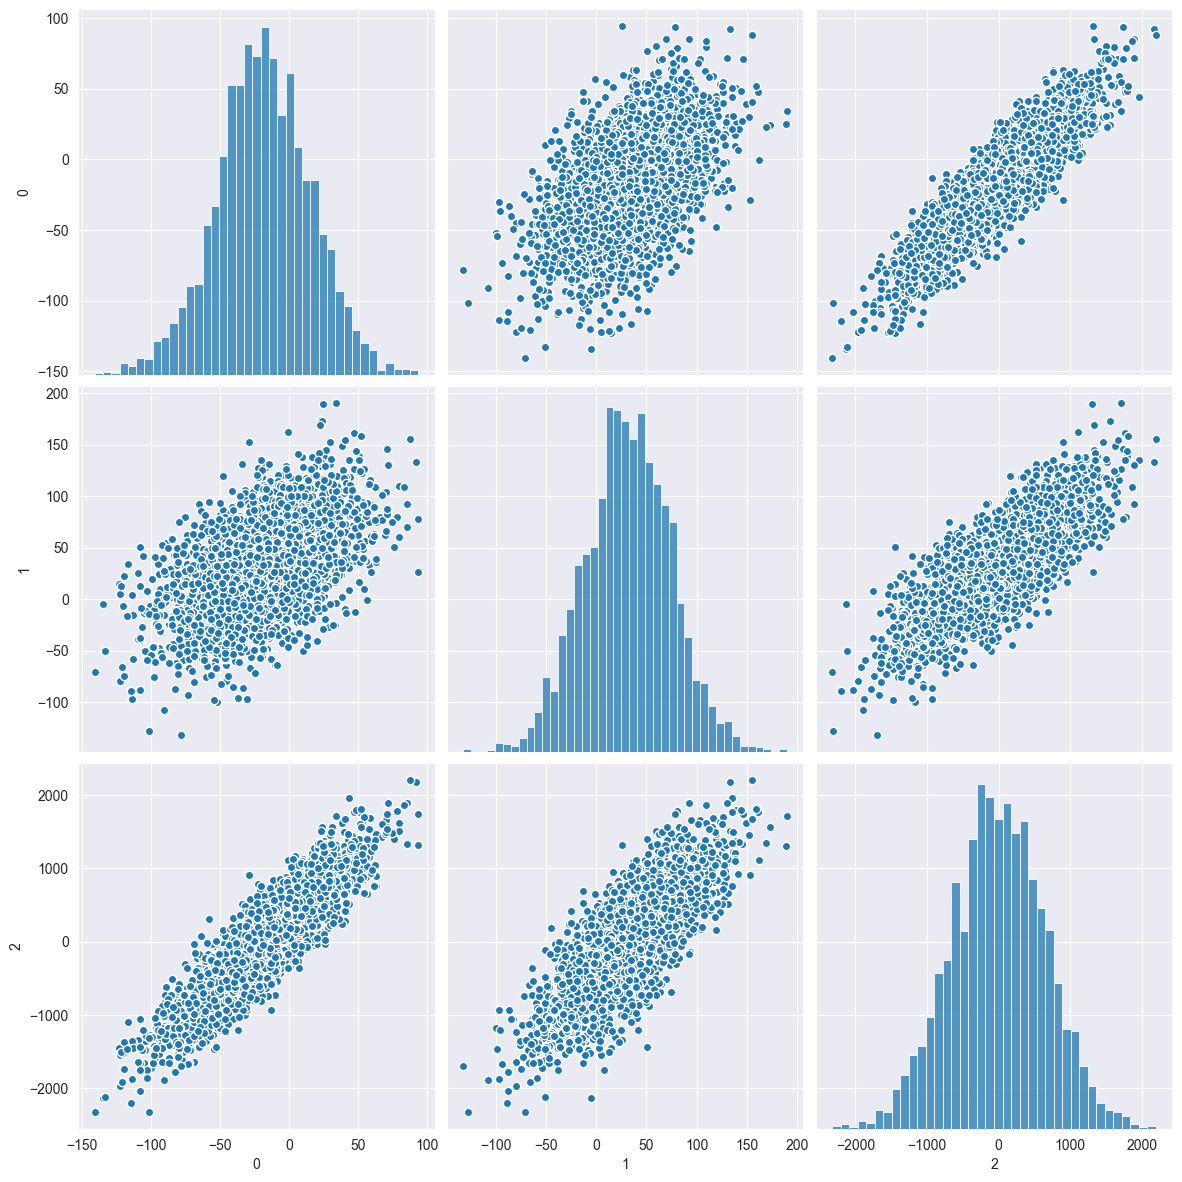

In [4]:
# EDA
sns.pairplot(data_df, plot_kws=dict(marker="o", linewidth=1), height=4)

<AxesSubplot:>

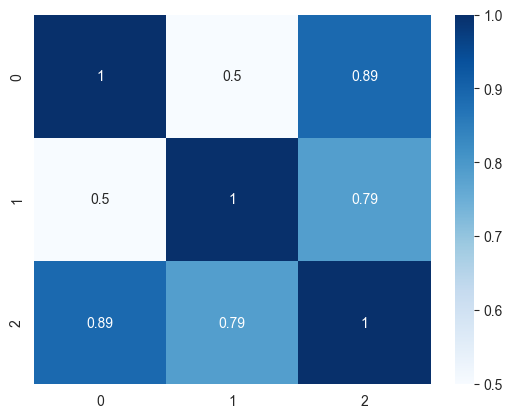

In [5]:
sns.heatmap(data_df.corr(), cmap="Blues", annot=True)

## 3. Prepare the data for modelling

In [6]:
# Separate the data: input and output.

In [7]:
# Perform a train-val-test split of 60-20-20.
# Use "random_state=42".
from sklearn.model_selection import train_test_split


X_train_val, X_test, y_train_val, y_test = train_test_split(data[:,:-1], data[:,-1], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

(array([ 1.,  2.,  2.,  2., 11., 18., 27., 50., 40., 70., 85., 73., 65.,
        58., 37., 17., 20., 12.,  6.,  4.]),
 array([-2.318840e+03, -2.108237e+03, -1.897634e+03, -1.687031e+03,
        -1.476428e+03, -1.265825e+03, -1.055222e+03, -8.446190e+02,
        -6.340160e+02, -4.234130e+02, -2.128100e+02, -2.207000e+00,
         2.083960e+02,  4.189990e+02,  6.296020e+02,  8.402050e+02,
         1.050808e+03,  1.261411e+03,  1.472014e+03,  1.682617e+03,
         1.893220e+03]),
 <BarContainer object of 20 artists>)

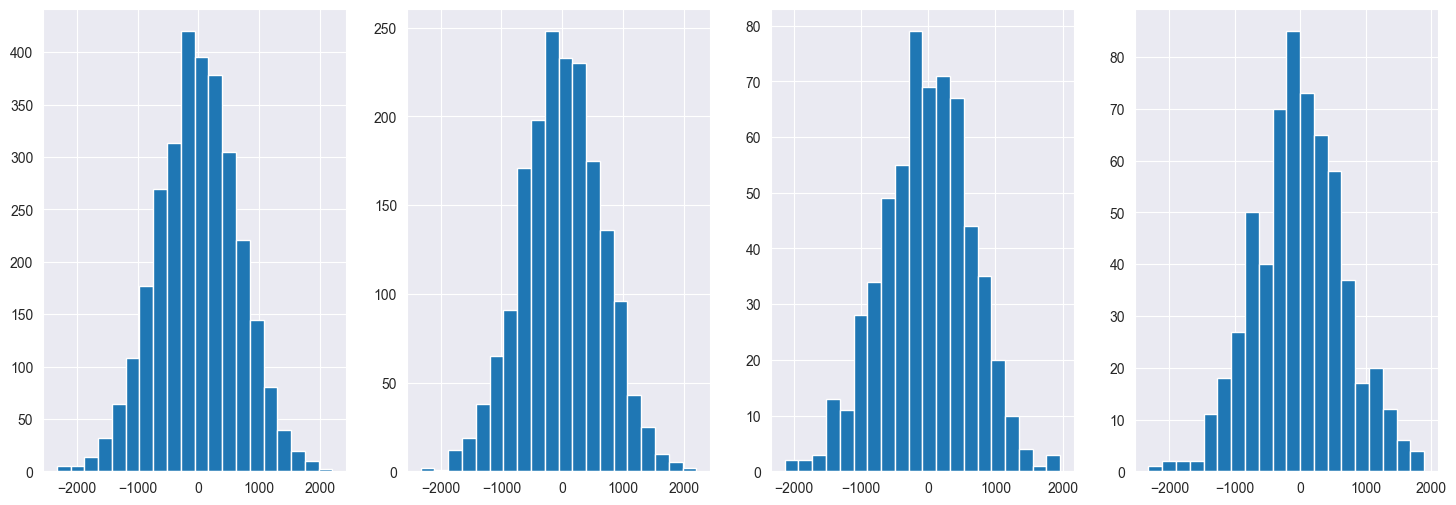

In [8]:
fig,axes = plt.subplots(1, 4, figsize=(18,6))
axes[0].hist(data[:,-1], bins=20)
axes[1].hist(y_train, bins=20)
axes[2].hist(y_val, bins=20)
axes[3].hist(y_test, bins=20)

 * From your understanding of the dataset, is stratified sampling necessary in this case? Why / Why not? <br><br>
<i>Answer: </i> The label ranges from are normally distributed and the random sampling is able to maintain that distribution and hence the sampling doesn't need any stratification.

## 4. Modelling

### 4.1 Linear Regression

In [9]:
# Implement Linear Regression.
# Use both train and val data for training purpose.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
q1_lin_preds = model_linear.predict(X_test)
q1_lin_preds_train = model_linear.predict(X_train)
model_linear.coef_

array([12.73284297,  7.10235207])

In [10]:
from sklearn.metrics import mean_squared_error


print('RMSE:', np.sqrt(mean_squared_error(y_true=y_test, y_pred=q1_lin_preds)))
print('Score:', model_linear.score(X_test, y_test))

RMSE: 148.51376984258394
Score: 0.9513675321883363


### 4.2 Ridge Reegression

In [11]:
# Implement Ridge Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Ridge

alphas = np.logspace(-5,5, 101)
scores_ridge = []
errors_ridge = []

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    scores_ridge.append(model.score(X_val, y_val))
    errors_ridge.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred= model.predict(X_val))))

print(np.argmax(scores_ridge), np.argmin(errors_ridge))
print(alphas[np.argmax(scores_ridge)], max(scores_ridge))

90 90
10000.0 0.9446310194027773


In [12]:
model_ridge_final = Ridge(alpha=alphas[np.argmax(scores_ridge)])
model_ridge_final.fit(X_train_val, y_train_val)
q1_ridge_preds = model_ridge_final.predict(X_test)
q1_ridge_preds_train = model_ridge_final.predict(X_train)


print('RMSE:', np.sqrt(mean_squared_error(y_true=y_test, y_pred=q1_ridge_preds)))
print('Score:', model_ridge_final.score(X_test, y_test))

RMSE: 148.50270674485625
Score: 0.951374777384595


### 4.3 Lasso Regression

In [13]:
# Implement Lasso Regression.
# Perform cross validation to find a good value for your hyper-parameter.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import Lasso
alphas = np.logspace(-5,5, 101)
scores_lasso = []
errors_lasso = []

for alpha in alphas:
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    scores_lasso.append(model.score(X_val, y_val))
    errors_lasso.append(np.sqrt(mean_squared_error(y_true=y_val, y_pred= model.predict(X_val))))

print(np.argmax(scores_lasso), np.argmin(errors_lasso))
print(alphas[np.argmax(scores_lasso)], max(scores_lasso))

70 70
100.0 0.9446424980318713


In [14]:
model_lasso_final = Lasso(alpha=alphas[np.argmax(scores_lasso)])
model_lasso_final.fit(X_train_val, y_train_val)
q1_lasso_preds = model_lasso_final.predict(X_test)
q1_lasso_preds_train = model_lasso_final.predict(X_train)


print('RMSE:', np.sqrt(mean_squared_error(y_true=y_test, y_pred=q1_lasso_preds)))
print('Score:', model_lasso_final.score(X_test, y_test))

RMSE: 148.46057500362826
Score: 0.9514023644195737


### 4.4 ElasticNet Regression

In [15]:
# Implement ElasticNet Regression.
# Perform cross validation to find a good value for your hyper-parameters.
# After choosing a good value for your hyper-parameter, use both train and val data for final training purpose of your model.
# Make preditions on both training(train+val) and test data.
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.logspace(-5, 5, 11), 'l1_ratio': np.logspace(-5, -1, 11)}
grid_elasticnet_model = GridSearchCV(ElasticNet(), param_grid=parameters, verbose=3, cv=4)
grid_elasticnet_model.fit(X_train_val, y_train_val)

Fitting 4 folds for each of 121 candidates, totalling 484 fits
[CV 1/4] END .......alpha=1e-05, l1_ratio=1e-05;, score=0.950 total time=   0.0s
[CV 2/4] END .......alpha=1e-05, l1_ratio=1e-05;, score=0.942 total time=   0.0s
[CV 3/4] END .......alpha=1e-05, l1_ratio=1e-05;, score=0.946 total time=   0.0s
[CV 4/4] END .......alpha=1e-05, l1_ratio=1e-05;, score=0.949 total time=   0.0s
[CV 1/4] END alpha=1e-05, l1_ratio=2.5118864315095822e-05;, score=0.950 total time=   0.0s
[CV 2/4] END alpha=1e-05, l1_ratio=2.5118864315095822e-05;, score=0.942 total time=   0.0s
[CV 3/4] END alpha=1e-05, l1_ratio=2.5118864315095822e-05;, score=0.946 total time=   0.0s
[CV 4/4] END alpha=1e-05, l1_ratio=2.5118864315095822e-05;, score=0.949 total time=   0.0s
[CV 1/4] END alpha=1e-05, l1_ratio=6.309573444801929e-05;, score=0.950 total time=   0.0s
[CV 2/4] END alpha=1e-05, l1_ratio=6.309573444801929e-05;, score=0.942 total time=   0.0s
[CV 3/4] END alpha=1e-05, l1_ratio=6.309573444801929e-05;, score=0.94

GridSearchCV(cv=4, estimator=ElasticNet(),
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05]),
                         'l1_ratio': array([1.00000000e-05, 2.51188643e-05, 6.30957344e-05, 1.58489319e-04,
       3.98107171e-04, 1.00000000e-03, 2.51188643e-03, 6.30957344e-03,
       1.58489319e-02, 3.98107171e-02, 1.00000000e-01])},
             verbose=3)

In [16]:
grid_elasticnet_model.best_params_['alpha']

1e-05

In [17]:
best_alpha, best_l1_ratio = grid_elasticnet_model.best_params_['alpha'], grid_elasticnet_model.best_params_['l1_ratio']
model_elastic_final = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio)
model_elastic_final.fit(X_train_val, y_train_val)
q1_elastic_preds = model_lasso_final.predict(X_test)
q1_elastic_preds_train = model_lasso_final.predict(X_train)

print('RMSE:', np.sqrt(mean_squared_error(y_true=y_test, y_pred=q1_elastic_preds)))
print('Score:', model_elastic_final.score(X_test, y_test))

RMSE: 148.46057500362826
Score: 0.9513936533821384


## 5. Analysis

In [18]:
# Write down the actual value along with the preditions from all the regression models, for the first 10 points in test data.

def print_predictions(label1, label2, model_name, y_pred, y_true):              # Common function to print data
    print(model_name)
    print(label1, '_________________________', label2)
    for i,j in list(zip(y_pred, y_true)):
        print(i, '        |        ', j)
    print()


print_predictions('Y_pred', 'Y_true', 'Linear', q1_lin_preds[:10], y_test[:10])
print_predictions('Y_pred', 'Y_true', 'Ridge', q1_ridge_preds[:10], y_test[:10])

Linear
Y_pred _________________________ Y_true
62.229063549126806         |         66.12
-577.0922133260448         |         -572.89
-111.95518554702412         |         -94.71
-412.87624349891786         |         -306.84
603.5401341468327         |         580.1
-18.728490805591903         |         -34.05
-172.01181370750726         |         -81.37
602.6830673277927         |         552.6
-42.223017798748025         |         -24.39
559.9179315894578         |         538.47

Ridge
Y_pred _________________________ Y_true
61.17805680066497         |         66.12
-576.6715469798254         |         -572.89
-112.62417005329553         |         -94.71
-412.09614940002314         |         -306.84
599.9897955099202         |         580.1
-19.32151310785416         |         -34.05
-172.00579580808284         |         -81.37
599.4981483185506         |         552.6
-43.54511809753688         |         -24.39
557.1467852421458         |         538.47



In [19]:
print_predictions('Y_pred', 'Y_true', 'Lasso', q1_lasso_preds[:10], y_test[:10])
print_predictions('Y_pred', 'Y_true', 'ElasticNet', q1_elastic_preds[:10], y_test[:10])

Lasso
Y_pred _________________________ Y_true
60.92609738233004         |         66.12
-574.3438670127006         |         -572.89
-112.15028211276508         |         -94.71
-411.32747538538894         |         -306.84
599.0770840164985         |         580.1
-19.576987466098938         |         -34.05
-171.94203776378853         |         -81.37
598.1471058455872         |         552.6
-42.75381843091256         |         -24.39
555.584997533293         |         538.47

ElasticNet
Y_pred _________________________ Y_true
60.92609738233004         |         66.12
-574.3438670127006         |         -572.89
-112.15028211276508         |         -94.71
-411.32747538538894         |         -306.84
599.0770840164985         |         580.1
-19.576987466098938         |         -34.05
-171.94203776378853         |         -81.37
598.1471058455872         |         552.6
-42.75381843091256         |         -24.39
555.584997533293         |         538.47



In [20]:
# Find both RMSE and MAE for all the regression models on both training(train+val) and testing data.
from sklearn.metrics import mean_absolute_error

print('Training Scores')
print_predictions('RMSE', 'MAE', 'Linear', np.sqrt([mean_squared_error(q1_lin_preds_train, y_train)]), [mean_absolute_error(q1_lin_preds_train, y_train)])
print_predictions('RMSE', 'MAE', 'Ridge', np.sqrt([mean_squared_error(q1_ridge_preds_train, y_train)]), [mean_absolute_error(q1_ridge_preds_train, y_train)])
print_predictions('RMSE', 'MAE', 'Lasso', np.sqrt([mean_squared_error(q1_lasso_preds_train, y_train)]), [mean_absolute_error(q1_lasso_preds_train, y_train)])
print_predictions('RMSE', 'MAE', 'ElasticNet', np.sqrt([mean_squared_error(q1_elastic_preds_train, y_train)]), [mean_absolute_error(q1_elastic_preds_train, y_train)])

Training Scores
Linear
RMSE _________________________ MAE
150.32049387764403         |         119.96239204804333

Ridge
RMSE _________________________ MAE
150.33955106468315         |         120.02460983583833

Lasso
RMSE _________________________ MAE
150.37404934134014         |         120.08372579323753

ElasticNet
RMSE _________________________ MAE
150.37404934134014         |         120.08372579323753



In [21]:
print('Testing Scores')
print_predictions('RMSE', 'MAE', 'Linear', np.sqrt([mean_squared_error(q1_lin_preds, y_test)]), [mean_absolute_error(q1_lin_preds, y_test)])
print_predictions('RMSE', 'MAE', 'Ridge', np.sqrt([mean_squared_error(q1_ridge_preds, y_test)]), [mean_absolute_error(q1_ridge_preds, y_test)])
print_predictions('RMSE', 'MAE', 'Lasso', np.sqrt([mean_squared_error(q1_lasso_preds, y_test)]), [mean_absolute_error(q1_lasso_preds, y_test)])
print_predictions('RMSE', 'MAE', 'ElasticNet', np.sqrt([mean_squared_error(q1_elastic_preds, y_test)]), [mean_absolute_error(q1_elastic_preds, y_test)])

Testing Scores
Linear
RMSE _________________________ MAE
148.51376984258394         |         118.7666325852712

Ridge
RMSE _________________________ MAE
148.50270674485625         |         118.77835282188443

Lasso
RMSE _________________________ MAE
148.46057500362826         |         118.71735411119259

ElasticNet
RMSE _________________________ MAE
148.46057500362826         |         118.71735411119259



## 6. Final Observations
Write down your final conclusions and observations

Since the output data is seems to be linearly dependent on the 2 input columns with some noise and the 2 input columns have a low correlation, so all 4 models give the similar results and use of L1 and L2 norms (in Ridge and Lasso Regression) doesn't improve the results.

# Question 2 (30 points)

Given the automobile dataset at https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv , 

## 1. Load and examine the dataset

<b><i>Assuming we need to predict city-mpg</i></b>

In [22]:
data_auto_original = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv')

In [23]:
data_auto = data_auto_original.copy()
data_auto.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [24]:
# Count no of columns with NA values
print(data_auto.columns[data_auto.isna().sum() > 0])
print(data_auto.isna().sum()[['stroke','horsepower-binned']])

Index(['stroke', 'horsepower-binned'], dtype='object')
stroke               4
horsepower-binned    1
dtype: int64


In [25]:
# Since only 5 data values have empty columns, we can remove them
data_auto.dropna(inplace=True)
print(data_auto.columns[data_auto.isna().sum() > 0])

Index([], dtype='object')


In [26]:
# Dropping other columns that are directly related to mpg column
data_auto.drop(['highway-mpg', 'city-L/100km'], axis=1, inplace=True)
data_auto.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'price', 'horsepower-binned',
       'diesel', 'gas'],
      dtype='object')

In [27]:
print(data_auto['diesel'].value_counts(), data_auto['gas'].value_counts())

# Since diesel and gas data are linearly dependent, we can remove it (As it affects the LR model)
data_auto.drop(['gas'], axis=1, inplace=True)

print(data_auto.columns)

0    176
1     20
Name: diesel, dtype: int64 1    176
0     20
Name: gas, dtype: int64
Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'price', 'horsepower-binned',
       'diesel'],
      dtype='object')


In [28]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          196 non-null    int64  
 1   normalized-losses  196 non-null    int64  
 2   make               196 non-null    object 
 3   aspiration         196 non-null    object 
 4   num-of-doors       196 non-null    object 
 5   body-style         196 non-null    object 
 6   drive-wheels       196 non-null    object 
 7   engine-location    196 non-null    object 
 8   wheel-base         196 non-null    float64
 9   length             196 non-null    float64
 10  width              196 non-null    float64
 11  height             196 non-null    float64
 12  curb-weight        196 non-null    int64  
 13  engine-type        196 non-null    object 
 14  num-of-cylinders   196 non-null    object 
 15  engine-size        196 non-null    int64  
 16  fuel-system        196 non

## 2. Visualise/Plot the regression model

Int64Index([17, 29, 87], dtype='int64')


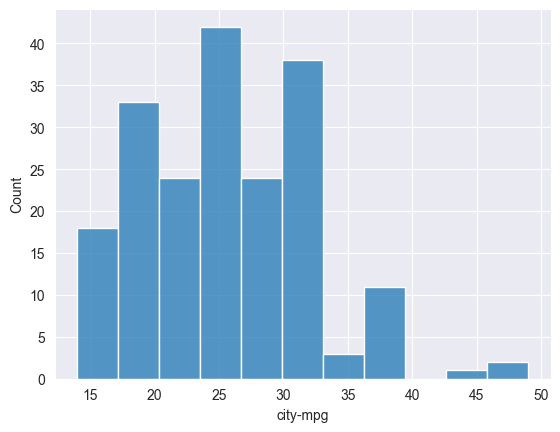

In [29]:
sns.histplot(data_auto['city-mpg'])

# Drop the outliers
print(data_auto[data_auto['city-mpg']>40].index)
data_auto.drop([17,29,87], axis=0,inplace=True)

<AxesSubplot:>

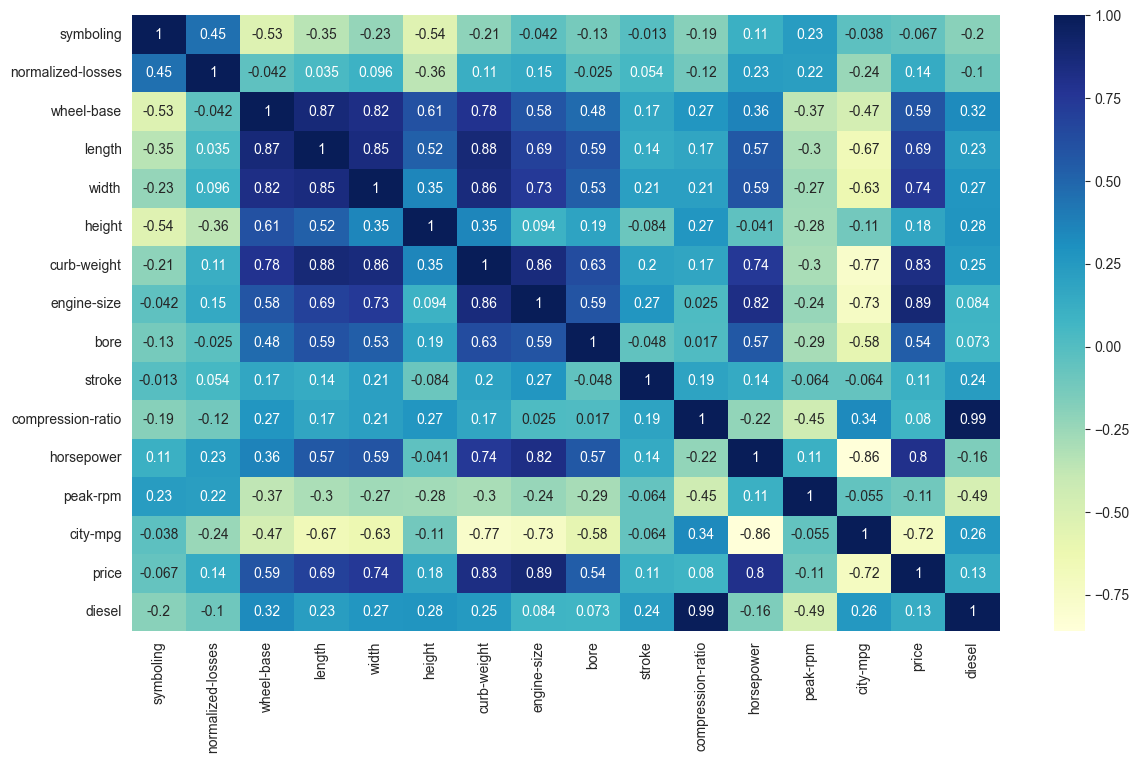

In [30]:
plt.figure(figsize=(14,8))
sns.heatmap(data_auto.corr(), cmap="YlGnBu", annot=True)

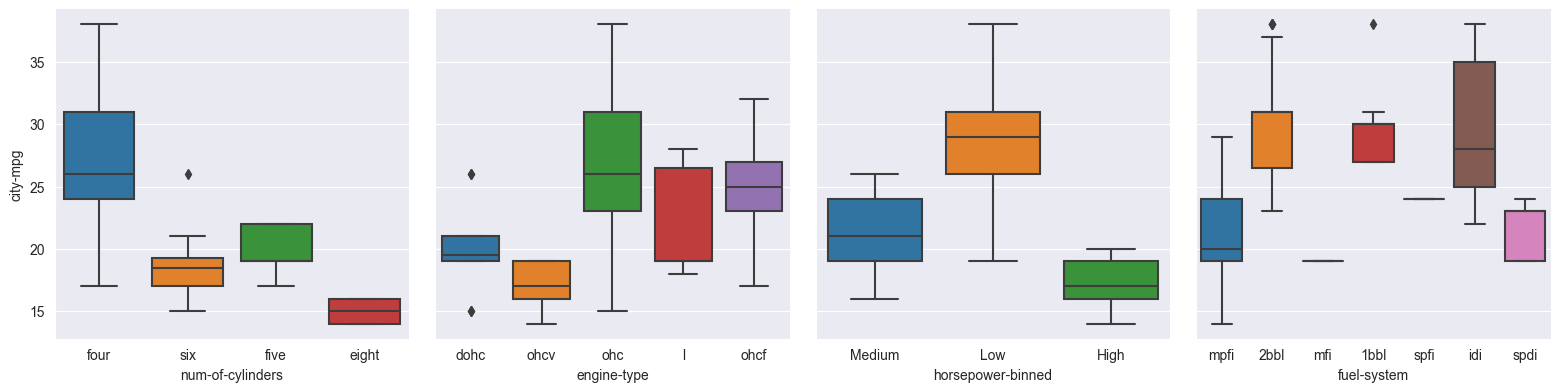

In [31]:
g = sns.PairGrid(data_auto, y_vars=["city-mpg"], x_vars=["num-of-cylinders", "engine-type", "horsepower-binned", "fuel-system"], height=4)
g.map(sns.boxplot)

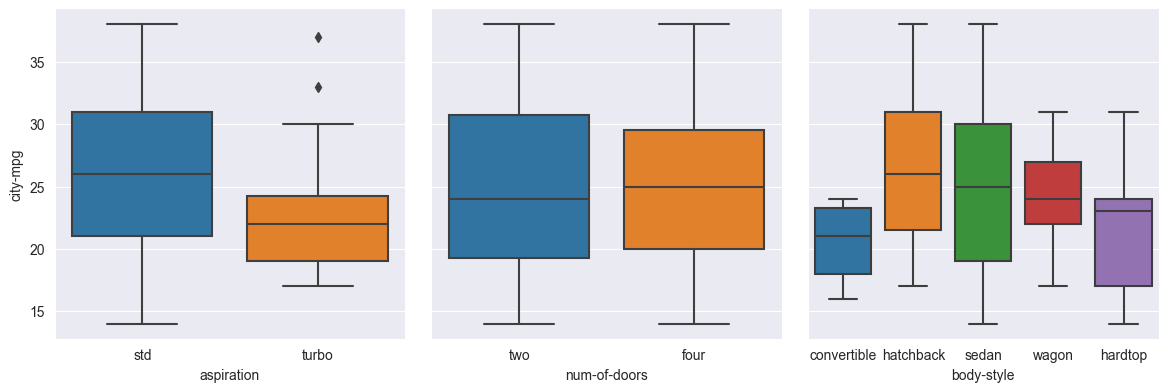

In [32]:
g = sns.PairGrid(data_auto, y_vars=["city-mpg"], x_vars=["aspiration", "num-of-doors", "body-style"], height=4)
g.map(sns.boxplot)

In [33]:
# Drop irrelevant categoical columns
data_auto = data_auto.drop(['engine-type', 'horsepower-binned', 'fuel-system', 'body-style', 'num-of-doors'], axis=1)

In [34]:
# Since, cylinders are ordered data, we can replace them with numerical values
num_cylinders = {'four':4, 'five':5, 'six': 6, 'seven':7, 'eight':8}
data_auto['num-of-cylinders'] = data_auto['num-of-cylinders'].apply(lambda x:num_cylinders[x])

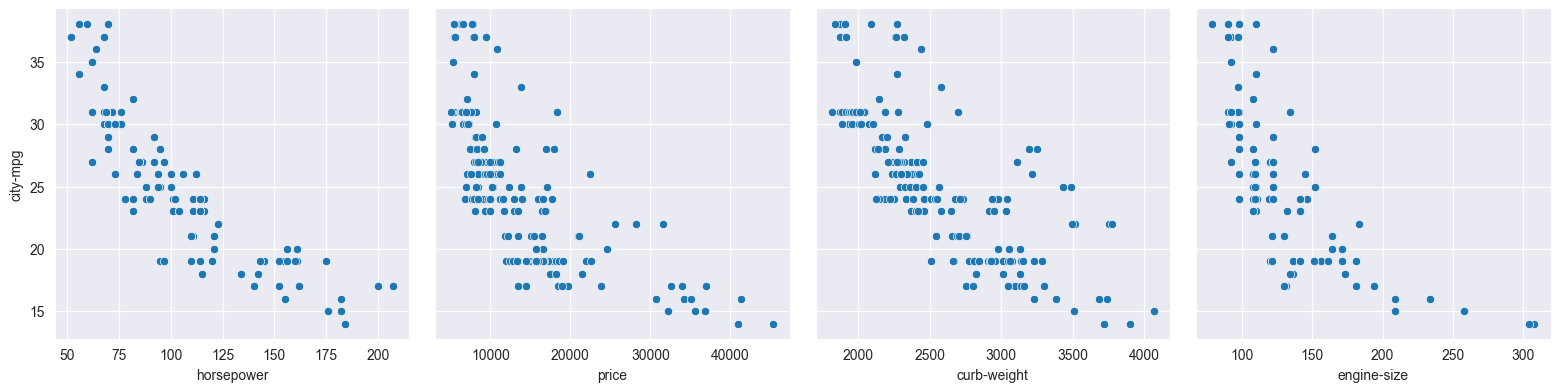

In [35]:
g = sns.PairGrid(data_auto, y_vars=["city-mpg"], x_vars=["horsepower", "price", "curb-weight", "engine-size"], height=4)
g.map(sns.scatterplot)

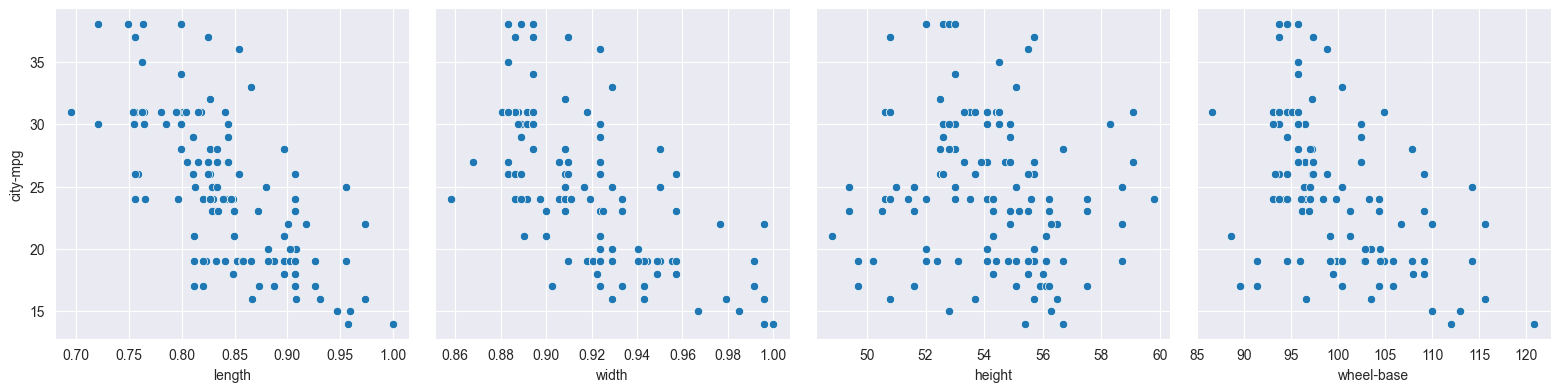

In [36]:
g = sns.PairGrid(data_auto, y_vars=["city-mpg"], x_vars=["length", "width", "height", "wheel-base"], height=4)
g.map(sns.scatterplot)

In [37]:
# Modifying existing columns for linearity
data_auto['horsepower'] = data_auto['horsepower'].apply(lambda d:np.e**(-d/50))
data_auto['price'] = data_auto['price'].apply(lambda d:np.e**(-d/30000))
data_auto['curb-weight'] = data_auto['curb-weight'].apply(lambda d:np.e**(-d/4000))
data_auto['engine-size'] = data_auto['engine-size'].apply(lambda d:np.log(4/d))
data_auto['width'] = data_auto['width'].apply(lambda d:np.log(4/d))
data_auto['wheel-base'] = data_auto['wheel-base'].apply(lambda d:np.e**(-d/120))

In [38]:
# Drop dependent/irrelevant numerical columns
data_auto = data_auto.drop(['symboling', 'length', 'height', 'stroke', 'peak-rpm'], axis=1)

In [39]:
# Create dummies (One hot encoding) for categorical variables
new_df = pd.DataFrame()
new_df = pd.get_dummies(data_auto.copy(), drop_first=True, prefix=data_auto.columns[data_auto.dtypes==object])
new_df.head()

,normalized-losses,wheel-base,width,curb-weight,num-of-cylinders,engine-size,bore,compression-ratio,horsepower,city-mpg,...,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,aspiration_turbo,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear
0,122,0.477910,1.502516,0.528877,4,-3.481240,3.47,9.0,0.108609,21,...,0,0,0,0,0,0,0,0,1,0
1,122,0.477910,1.502516,0.528877,4,-3.481240,3.47,9.0,0.108609,21,...,0,0,0,0,0,0,0,0,1,0
2,122,0.454981,1.480910,0.493738,6,-3.637586,2.68,9.0,0.045959,19,...,0,0,0,0,0,0,0,0,1,0
3,164,0.435323,1.470280,0.557524,4,-3.305054,3.19,10.0,0.130029,24,...,0,0,0,0,0,0,0,1,0,0
4,164,0.436777,1.467263,0.493615,5,-3.526361,3.19,8.0,0.100259,18,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Split the data into train and test sets
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(new_df.loc[:, new_df.columns != 'city-mpg'], new_df['city-mpg'], test_size=0.2, random_state=42)

## 3. Generate a Linear Regression equation

In [41]:
q2_model_linear = LinearRegression()
q2_model_linear.fit(X_train_q2, y_train_q2)
q2_preds = q2_model_linear.predict(X_test_q2)

In [53]:
print('Coeffficients:', q2_model_linear.coef_)

Coeffficients: [-4.72530116e-03  1.65874773e+01 -8.32683839e+00  4.44276873e+01
 -2.77778494e-01 -4.12352292e+00  1.54155607e-01  1.47082389e+00
  2.88249621e+01  3.95329502e+00 -1.41259000e+01  6.32526936e-01
  2.21731957e+00  8.00995202e+00  1.48667248e+00  2.30565037e+00
  7.46773830e-01  4.10198547e+00  1.73214575e+00  2.16445360e+00
  1.77635684e-14  1.74386916e+00  1.88817450e+00  3.02489464e+00
  3.03351128e+00 -6.64150144e-01  1.95227753e-01  2.53273769e-01
  1.67313455e+00  2.92256579e+00  1.04737061e+00  2.50216034e+00
  8.89564207e-01  1.38069932e+00  1.02409546e+00 -6.64150144e-01]


## 4. Use a residual plot to inspect if LR fits the model

<AxesSubplot:xlabel='city-mpg'>

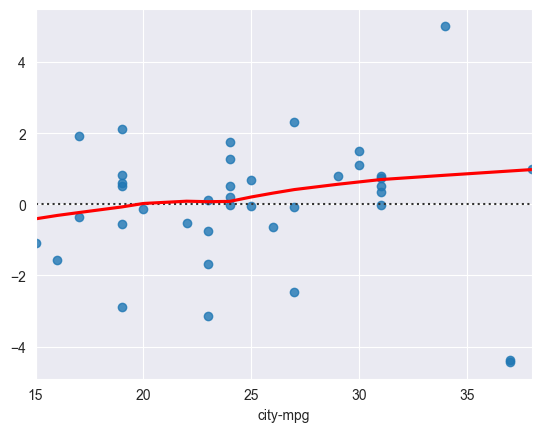

In [42]:
sns.residplot(y=q2_preds, x=y_test_q2, lowess=True, line_kws=dict(color="r"))

## 5. Use R2 and MSE to determine the accuracy of the LR fit 

In [43]:
print('R2 score:', q2_model_linear.score(X_test_q2, y_test_q2))
print('MSE:', mean_squared_error(q2_preds, y_test_q2))

R2 score: 0.9028444340648635
MSE: 3.428741925224363


# Question 3 (20 points)

### In this assignment, you will experiment with a toy dataset – the Iris dataset.

## 1. Load the Iris dataset.

In [44]:
# use -  sklearn.datasets.load_iris
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [45]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df['target'] = iris_data['target']
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 2. The Iris data has 3 classes. For the purpose of this assignment, you will modify it such that it has two classes – specifically, you will merge the “setosa” and “versicolor” classes.

In [47]:
iris_df['target'] = iris_df['target'].apply(lambda x:0 if x==1 else x)

## 3. Construct a training set and a testing set using 80-20 split using random sampling.

In [48]:
X_q3_rnd_train, X_q3_rnd_test, y_q3_rnd_train, y_q3_rnd_test = train_test_split(iris_df.loc[:, iris_df.columns != 'target'], iris_df['target'], test_size=0.2, random_state=42)

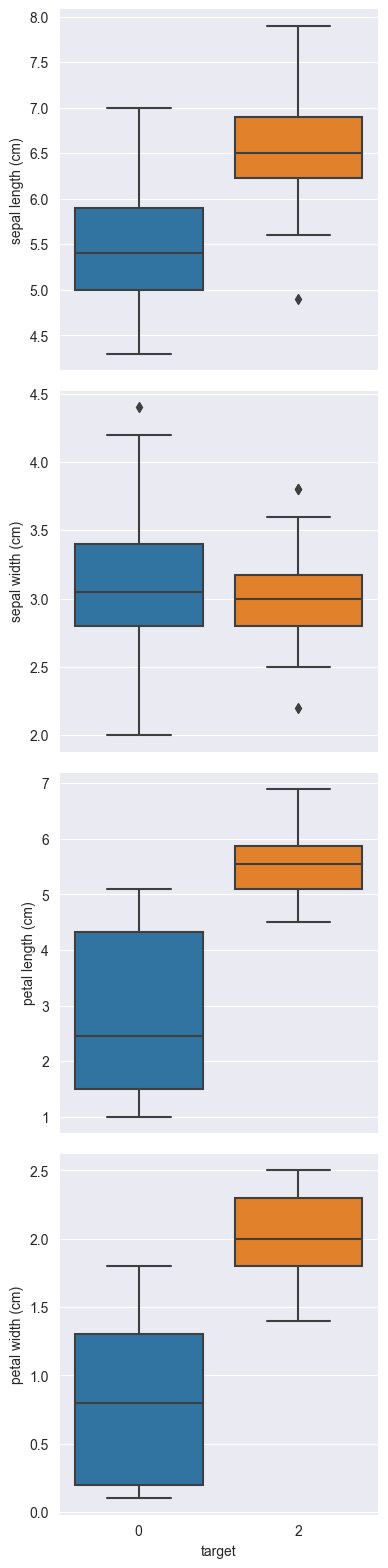

In [49]:
g = sns.PairGrid(iris_df, y_vars=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], x_vars=['target'], height=4)
g.map(sns.boxplot)

## 4. Use Logistic Regression as a black box classifier and assess the performance.

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

model_q3_rnd = LogisticRegression()
model_q3_rnd.fit(X_q3_rnd_train, y_q3_rnd_train)

print('Accuracy:', accuracy_score(model_q3_rnd.predict(X_q3_rnd_test), y_q3_rnd_test))
print('Confusion Matrix:', confusion_matrix(model_q3_rnd.predict(X_q3_rnd_test), y_q3_rnd_test))

Accuracy: 1.0
Confusion Matrix: [[19  0]
 [ 0 11]]


## 5. Implement stratified sampling, again using the 80-20 split. Decide the stratification variable and explain your choice.

In [51]:
X_q3_str_train, X_q3_str_test, y_q3_str_train, y_q3_str_test = train_test_split(iris_df.loc[:, iris_df.columns != 'target'], iris_df['target'], test_size=0.2, stratify=iris_df['target'], random_state=42)

The stratification variable is the class label itself as it divides the data into 2 distinct sets.

## 6. Re-assess the performance. Comment on any changes from the random sampling case. If there is no significant change, comment on why or why not?

In [52]:
from sklearn.linear_model import LogisticRegression


model_q3_str = LogisticRegression()
model_q3_str.fit(X_q3_str_train, y_q3_str_train)

print('Accuracy:', accuracy_score(model_q3_str.predict(X_q3_rnd_test), y_q3_rnd_test))
print('Confusion Matrix:', confusion_matrix(model_q3_str.predict(X_q3_rnd_test), y_q3_rnd_test))

Accuracy: 1.0
Confusion Matrix: [[19  0]
 [ 0 11]]


<i>Answer:</i> Both the models are equally good and give 100% accuracy. This is probably because after merging 2 classes we find that the data is very clearly linearly seperable and this is evident in the wide range observed in the boxplots of the 2 classes. Thus, stratified sampling does improve the results in this case.